In [1]:
import os
import nltk
import json
import pandas as pd
from path import Path
%matplotlib inline
from pandas.io.json import json_normalize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("NEWSAPI_KEY")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [50]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('btc.json', 'w') as json_file:
    json.dump(btc_headlines, json_file)

In [37]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [100]:
#read in the json file
eth = pd.read_json ('Data/eth.json')
#parse the json and load into a dataframe
eth_df = json_normalize(eth['articles'])
#drop all columns except for description
eth_df = eth_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = eth_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
eth_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
eth_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
eth_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
eth_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
eth_df

description    Comp    Pos    Neu  \
0   TL;DR: The in-depth Complete Blockchain and Et...  0.5719  0.099  0.901   
1   Disrupt Berlin is right around the corner. And...  0.6249  0.104  0.896   
2   After first teasing the device earlier this ye...  0.5574  0.104  0.869   
3   he plaBy now, you should almost certainly know...  0.4601  0.089  0.911   
4   TLDR: The Complete Blockchain and Ethereum Pro...  0.4019  0.101  0.899   
..                                                ...     ...    ...    ...   
95  Crypto startup Knabu is launching a 30-day pil...  0.0000  0.000  1.000   
96  Microsoft has revealed a new platform aimed to...  0.4404  0.132  0.868   
97  Ethereum isn’t the only stablecoin game in tow...  0.0772  0.040  0.960   
98  Traders are closely watching Ethereum and Bitc...  0.0000  0.000  1.000   
99  Bitcoin and Ethereum are consolidating within ...  0.2023  0.058  0.905   

      Neg  
0   0.000  
1   0.000  
2   0.028  
3   0.000  
4   0.000  
..    ...  
95  0.000  
96  0.000  
97  0.000  
98  0.000  
99  0.038  

[100 rows x 5 columns]

In [4]:
#read in the json file
btc = pd.read_json ('Data/btc.json')
#parse the json and load into a dataframe
btc_df = json_normalize(btc['articles'])
#drop all columns except for description
btc_df = btc_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = btc_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
btc_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
btc_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
btc_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
btc_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
btc_df

description    Comp    Pos    Neu  \
0   Cryptocurrency mining now uses more of the Nor...  0.0000  0.000  1.000   
1   After first teasing the device earlier this ye...  0.5574  0.104  0.869   
2   Say it with me: Bitcoin is not anonymous. Thre... -0.4767  0.000  0.928   
3   Federal authorities in the U.S. have unsealed ...  0.0258  0.064  0.853   
4   High school students in France may be among th...  0.0000  0.000  1.000   
..                                                ...     ...    ...    ...   
95  Bitcoin prices have quietly been in meltdown m...  0.0000  0.000  1.000   
96  After seeing its IPO dreams slashed earlier th...  0.2023  0.070  0.881   
97  I hate to be the bearer of bad news, but victi... -0.7140  0.083  0.727   
98  Headless brands are decentralized consensus sy...  0.0000  0.000  1.000   
99  China, notorious for its lack of privacy, appr... -0.3400  0.057  0.837   

      Neg  
0   0.000  
1   0.028  
2   0.072  
3   0.083  
4   0.000  
..    ...  
95  0.000  
96  0.049  
97  0.191  
98  0.000  
99  0.106  

[100 rows x 5 columns]

In [5]:
#stats for each dataframe
btc_df.describe()

Comp        Pos         Neu         Neg
count  100.000000  100.00000  100.000000  100.000000
mean     0.117949    0.06286    0.886580    0.050570
std      0.458674    0.05767    0.089459    0.072167
min     -0.843300    0.00000    0.538000    0.000000
25%     -0.127600    0.00000    0.841250    0.000000
50%      0.096350    0.06800    0.901500    0.014000
75%      0.507000    0.08800    0.935250    0.072250
max      0.914100    0.23600    1.000000    0.282000

In [6]:
#stats for each dataframe
eth_df.describe()

Comp         Pos         Neu         Neg
count  100.000000  100.000000  100.000000  100.000000
mean     0.053174    0.061140    0.886960    0.051940
std      0.399801    0.076897    0.101474    0.076298
min     -0.735100    0.000000    0.644000    0.000000
25%     -0.153100    0.000000    0.827250    0.000000
50%      0.000000    0.000000    0.902000    0.000000
75%      0.361200    0.104750    1.000000    0.087250
max      0.743000    0.343000    1.000000    0.302000

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re

In [8]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# Expand the default stopwords list if necessary

In [10]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens


In [11]:
#add column to dataframe with tokenized text
btc_df['tokens'] = btc_df.apply(lambda x : tokenizer(x['description']), axis=1)
btc_df

description    Comp    Pos    Neu  \
0   Cryptocurrency mining now uses more of the Nor...  0.0000  0.000  1.000   
1   After first teasing the device earlier this ye...  0.5574  0.104  0.869   
2   Say it with me: Bitcoin is not anonymous. Thre... -0.4767  0.000  0.928   
3   Federal authorities in the U.S. have unsealed ...  0.0258  0.064  0.853   
4   High school students in France may be among th...  0.0000  0.000  1.000   
..                                                ...     ...    ...    ...   
95  Bitcoin prices have quietly been in meltdown m...  0.0000  0.000  1.000   
96  After seeing its IPO dreams slashed earlier th...  0.2023  0.070  0.881   
97  I hate to be the bearer of bad news, but victi... -0.7140  0.083  0.727   
98  Headless brands are decentralized consensus sy...  0.0000  0.000  1.000   
99  China, notorious for its lack of privacy, appr... -0.3400  0.057  0.837   

      Neg                                             tokens  
0   0.000  cryptocurrency, mining, us, nordic, island, na...  
1   0.028  first, teasing, device, earlier, year, htc, de...  
2   0.072  say, bitcoin, anonymous, three, hundred, thirt...  
3   0.083  federal, authority, u, unsealed, charge, south...  
4   0.000  high, school, student, france, may, among, fir...  
..    ...                                                ...  
95  0.000  bitcoin, price, quietly, meltdown, mode, recen...  
96  0.049  seeing, ipo, dream, slashed, earlier, year, bi...  
97  0.191  hate, bearer, bad, news, victim, lost, money, ...  
98  0.000  headless, brand, decentralized, consensus, sys...  
99  0.106  china, notorious, lack, privacy, approved, new...  

[100 rows x 6 columns]

In [12]:
#add column to dataframe with tokenized text
eth_df['tokens'] = eth_df.apply(lambda x : tokenizer(x['description']), axis=1)
eth_df

description    Comp    Pos    Neu  \
0   TL;DR: The in-depth Complete Blockchain and Et...  0.5719  0.099  0.901   
1   Disrupt Berlin is right around the corner. And...  0.6249  0.104  0.896   
2   After first teasing the device earlier this ye...  0.5574  0.104  0.869   
3   he plaBy now, you should almost certainly know...  0.4601  0.089  0.911   
4   TLDR: The Complete Blockchain and Ethereum Pro...  0.4019  0.101  0.899   
..                                                ...     ...    ...    ...   
95  Crypto startup Knabu is launching a 30-day pil...  0.0000  0.000  1.000   
96  Microsoft has revealed a new platform aimed to...  0.4404  0.132  0.868   
97  Ethereum isn’t the only stablecoin game in tow...  0.0772  0.040  0.960   
98  Traders are closely watching Ethereum and Bitc...  0.0000  0.000  1.000   
99  Bitcoin and Ethereum are consolidating within ...  0.2023  0.058  0.905   

      Neg                                             tokens  
0   0.000  tldr, indepth, complete, blockchain, ethereum,...  
1   0.000  disrupt, berlin, right, around, corner, plenty...  
2   0.028  first, teasing, device, earlier, year, htc, de...  
3   0.000  plaby, almost, certainly, know, ethereum, seco...  
4   0.000  tldr, complete, blockchain, ethereum, programm...  
..    ...                                                ...  
95  0.000  crypto, startup, knabu, launching, day, pilot,...  
96  0.000  microsoft, revealed, new, platform, aimed, mak...  
97  0.000  ethereum, isnt, stablecoin, game, town, number...  
98  0.000  trader, closely, watching, ethereum, bitcoin, ...  
99  0.038  bitcoin, ethereum, consolidating, within, narr...  

[100 rows x 6 columns]

# ---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
#using sklearn to count ngrams
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(btc_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
btc_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
btc_df_freq_2 = btc_df_freq_2.sort_values(by='frequency', ascending=False)
btc_df_freq_2.head(10)

frequency
satoshi nakaboto         42
welcome another          22
bitcoin every            21
every fucking            21
going bitcoin            21
writes bitcoin           21
fucking day              21
bitcoin today            21
nakaboto tell            21
nakaboto writes          21

In [22]:
#using sklearn to count ngrams
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(eth_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
eth_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
eth_df_freq_2 = eth_df_freq_2.sort_values(by='frequency', ascending=False)
eth_df_freq_2.head(10)

frequency
key level                    7
blockchain ethereum          7
complete blockchain          5
start day                    4
failure move                 4
move key                     4
ethereum blockchain          4
bitcoin price                4
could test                   3
digital currency             3

In [24]:
#using sklearn to count ngrams
word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(btc_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
btc_df_freq_1 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
btc_df_freq_1 = btc_df_freq_1.sort_values(by='frequency', ascending=False)
btc_df_freq_1.head(10)

frequency
bitcoin                 105
satoshi                  46
satoshi nakaboto         42
nakaboto                 42
cryptocurrency           32
welcome                  26
say                      25
past                     24
used                     23
day                      23

In [25]:
#using sklearn to count ngrams
word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(eth_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
eth_df_freq_1 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
eth_df_freq_1 = eth_df_freq_1.sort_values(by='frequency', ascending=False)
eth_df_freq_1.head(10)

frequency
key level                    7
blockchain ethereum          7
complete blockchain          5
start day                    4
failure move                 4
move key                     4
ethereum blockchain          4
bitcoin price                4
could test                   3
digital currency             3

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [39]:
#join all text in tokens column into 1 string
corpus_btc = btc_df['tokens'].str.cat(sep=', ')
corpus_eth = eth_df['tokens'].str.cat(sep=', ')

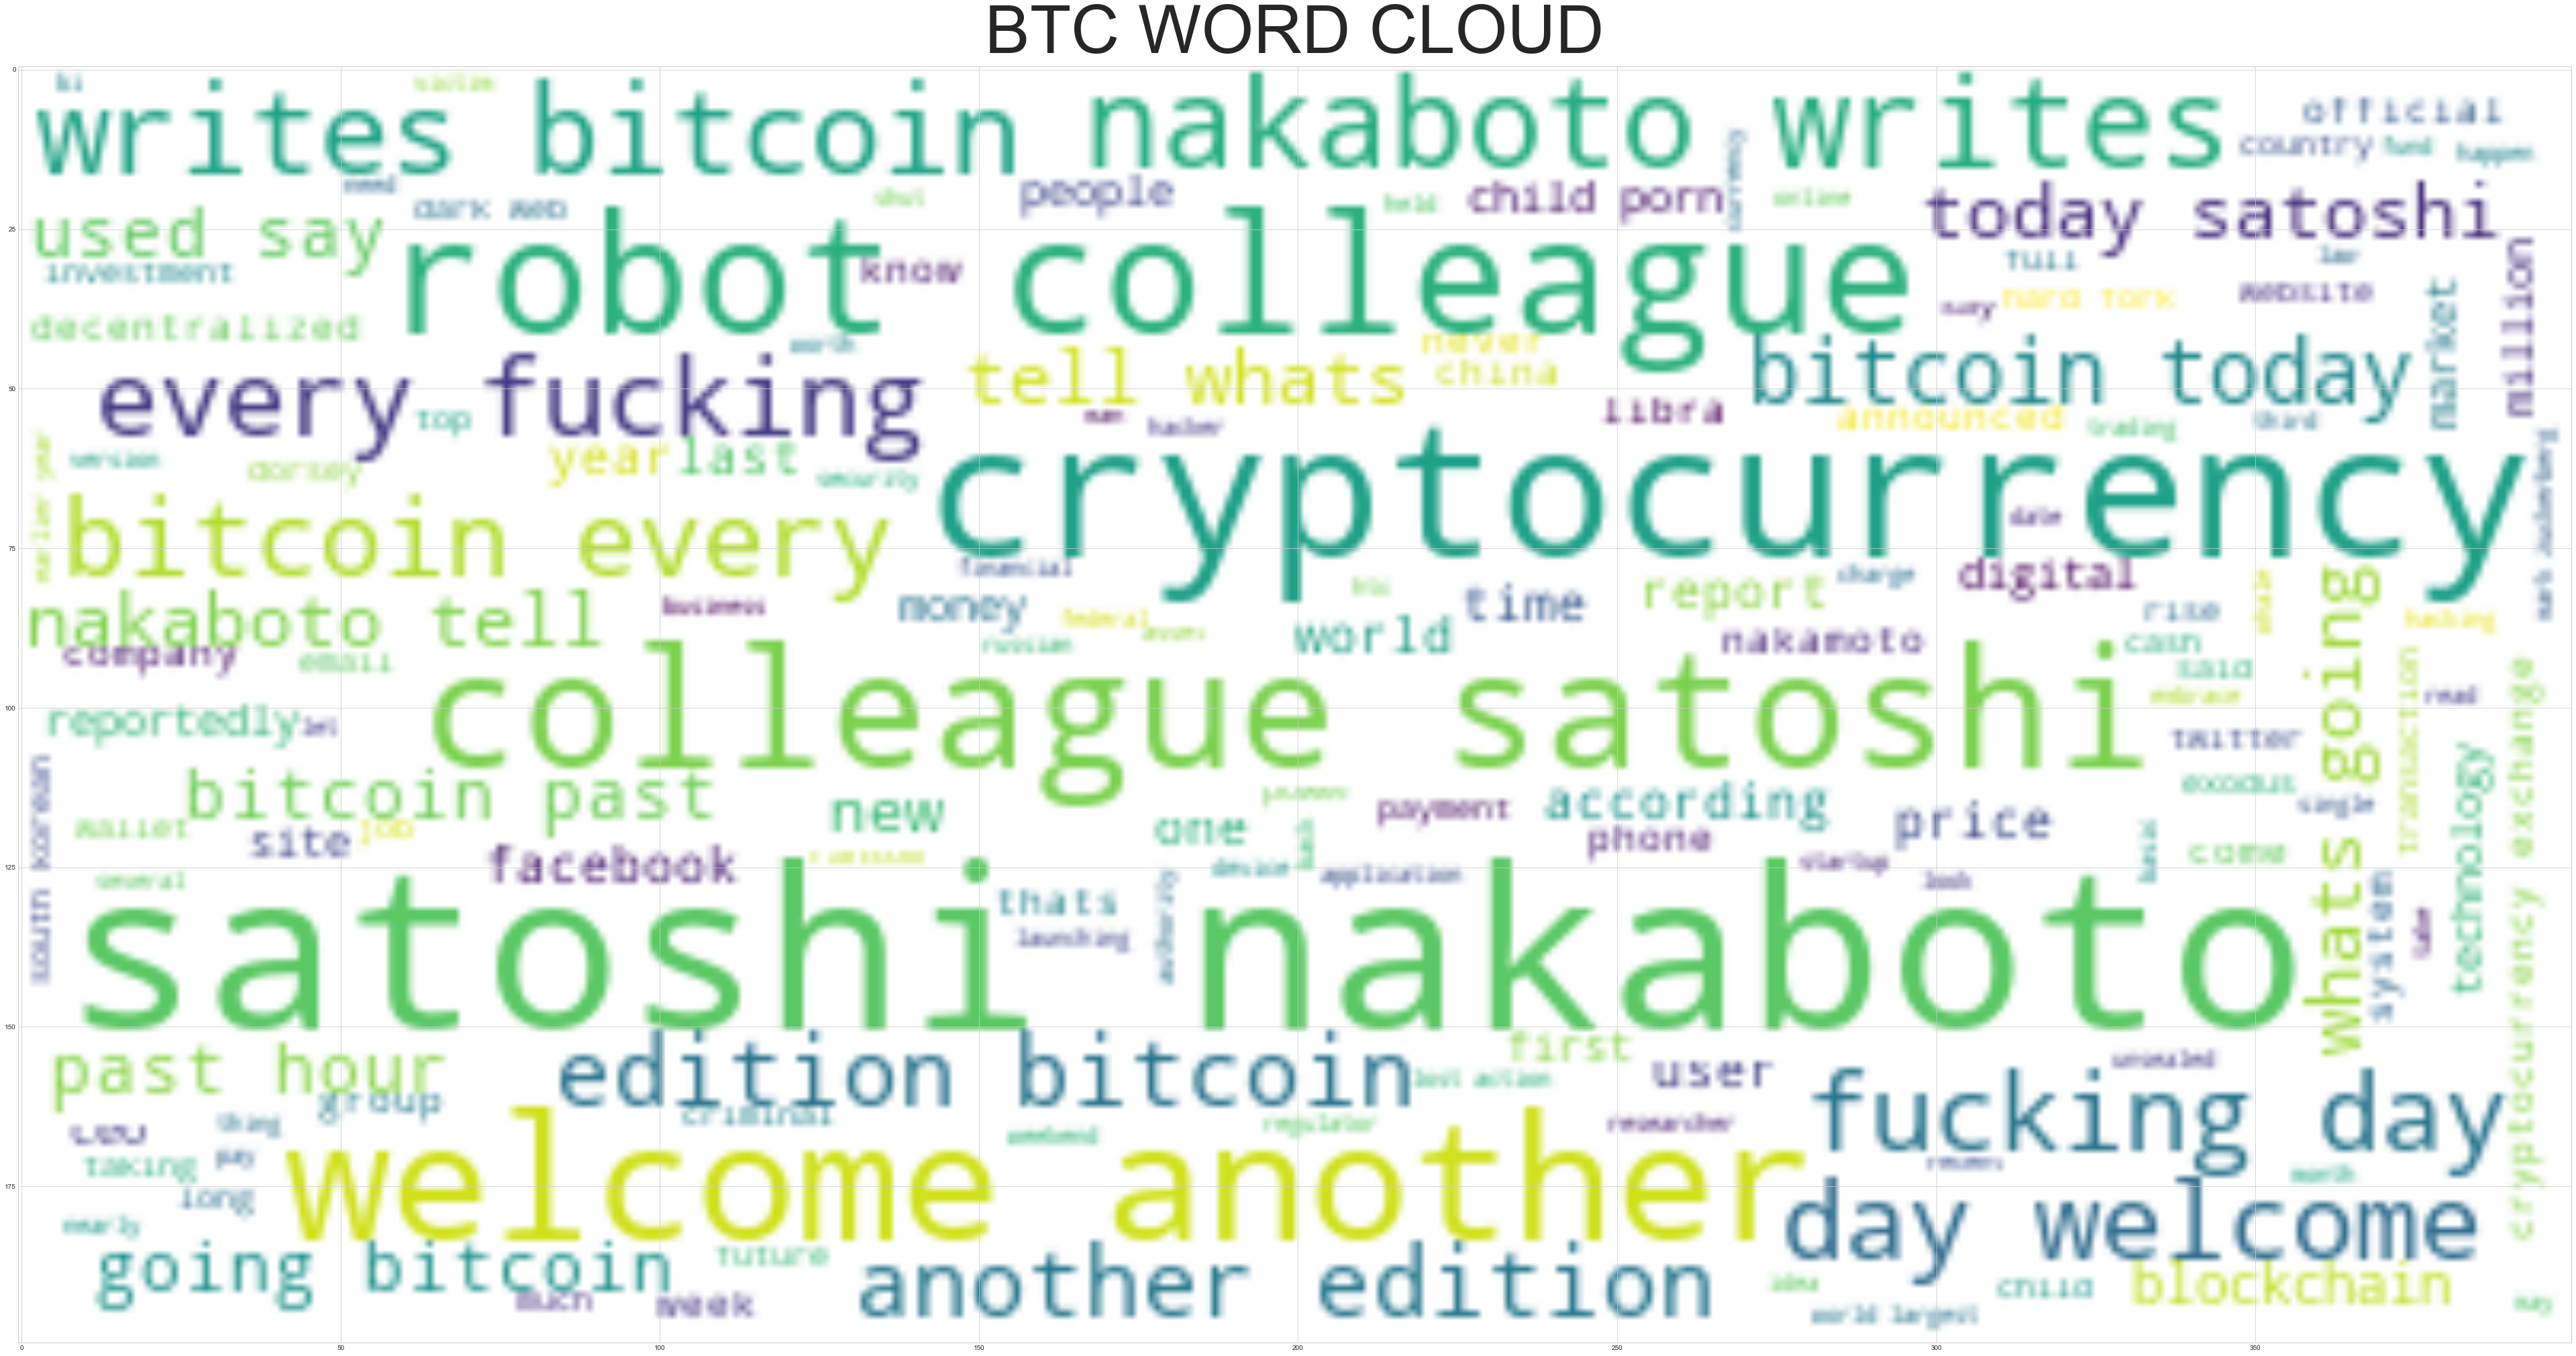

In [40]:
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_btc)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("BTC WORD CLOUD",fontsize=100)
plt.show()


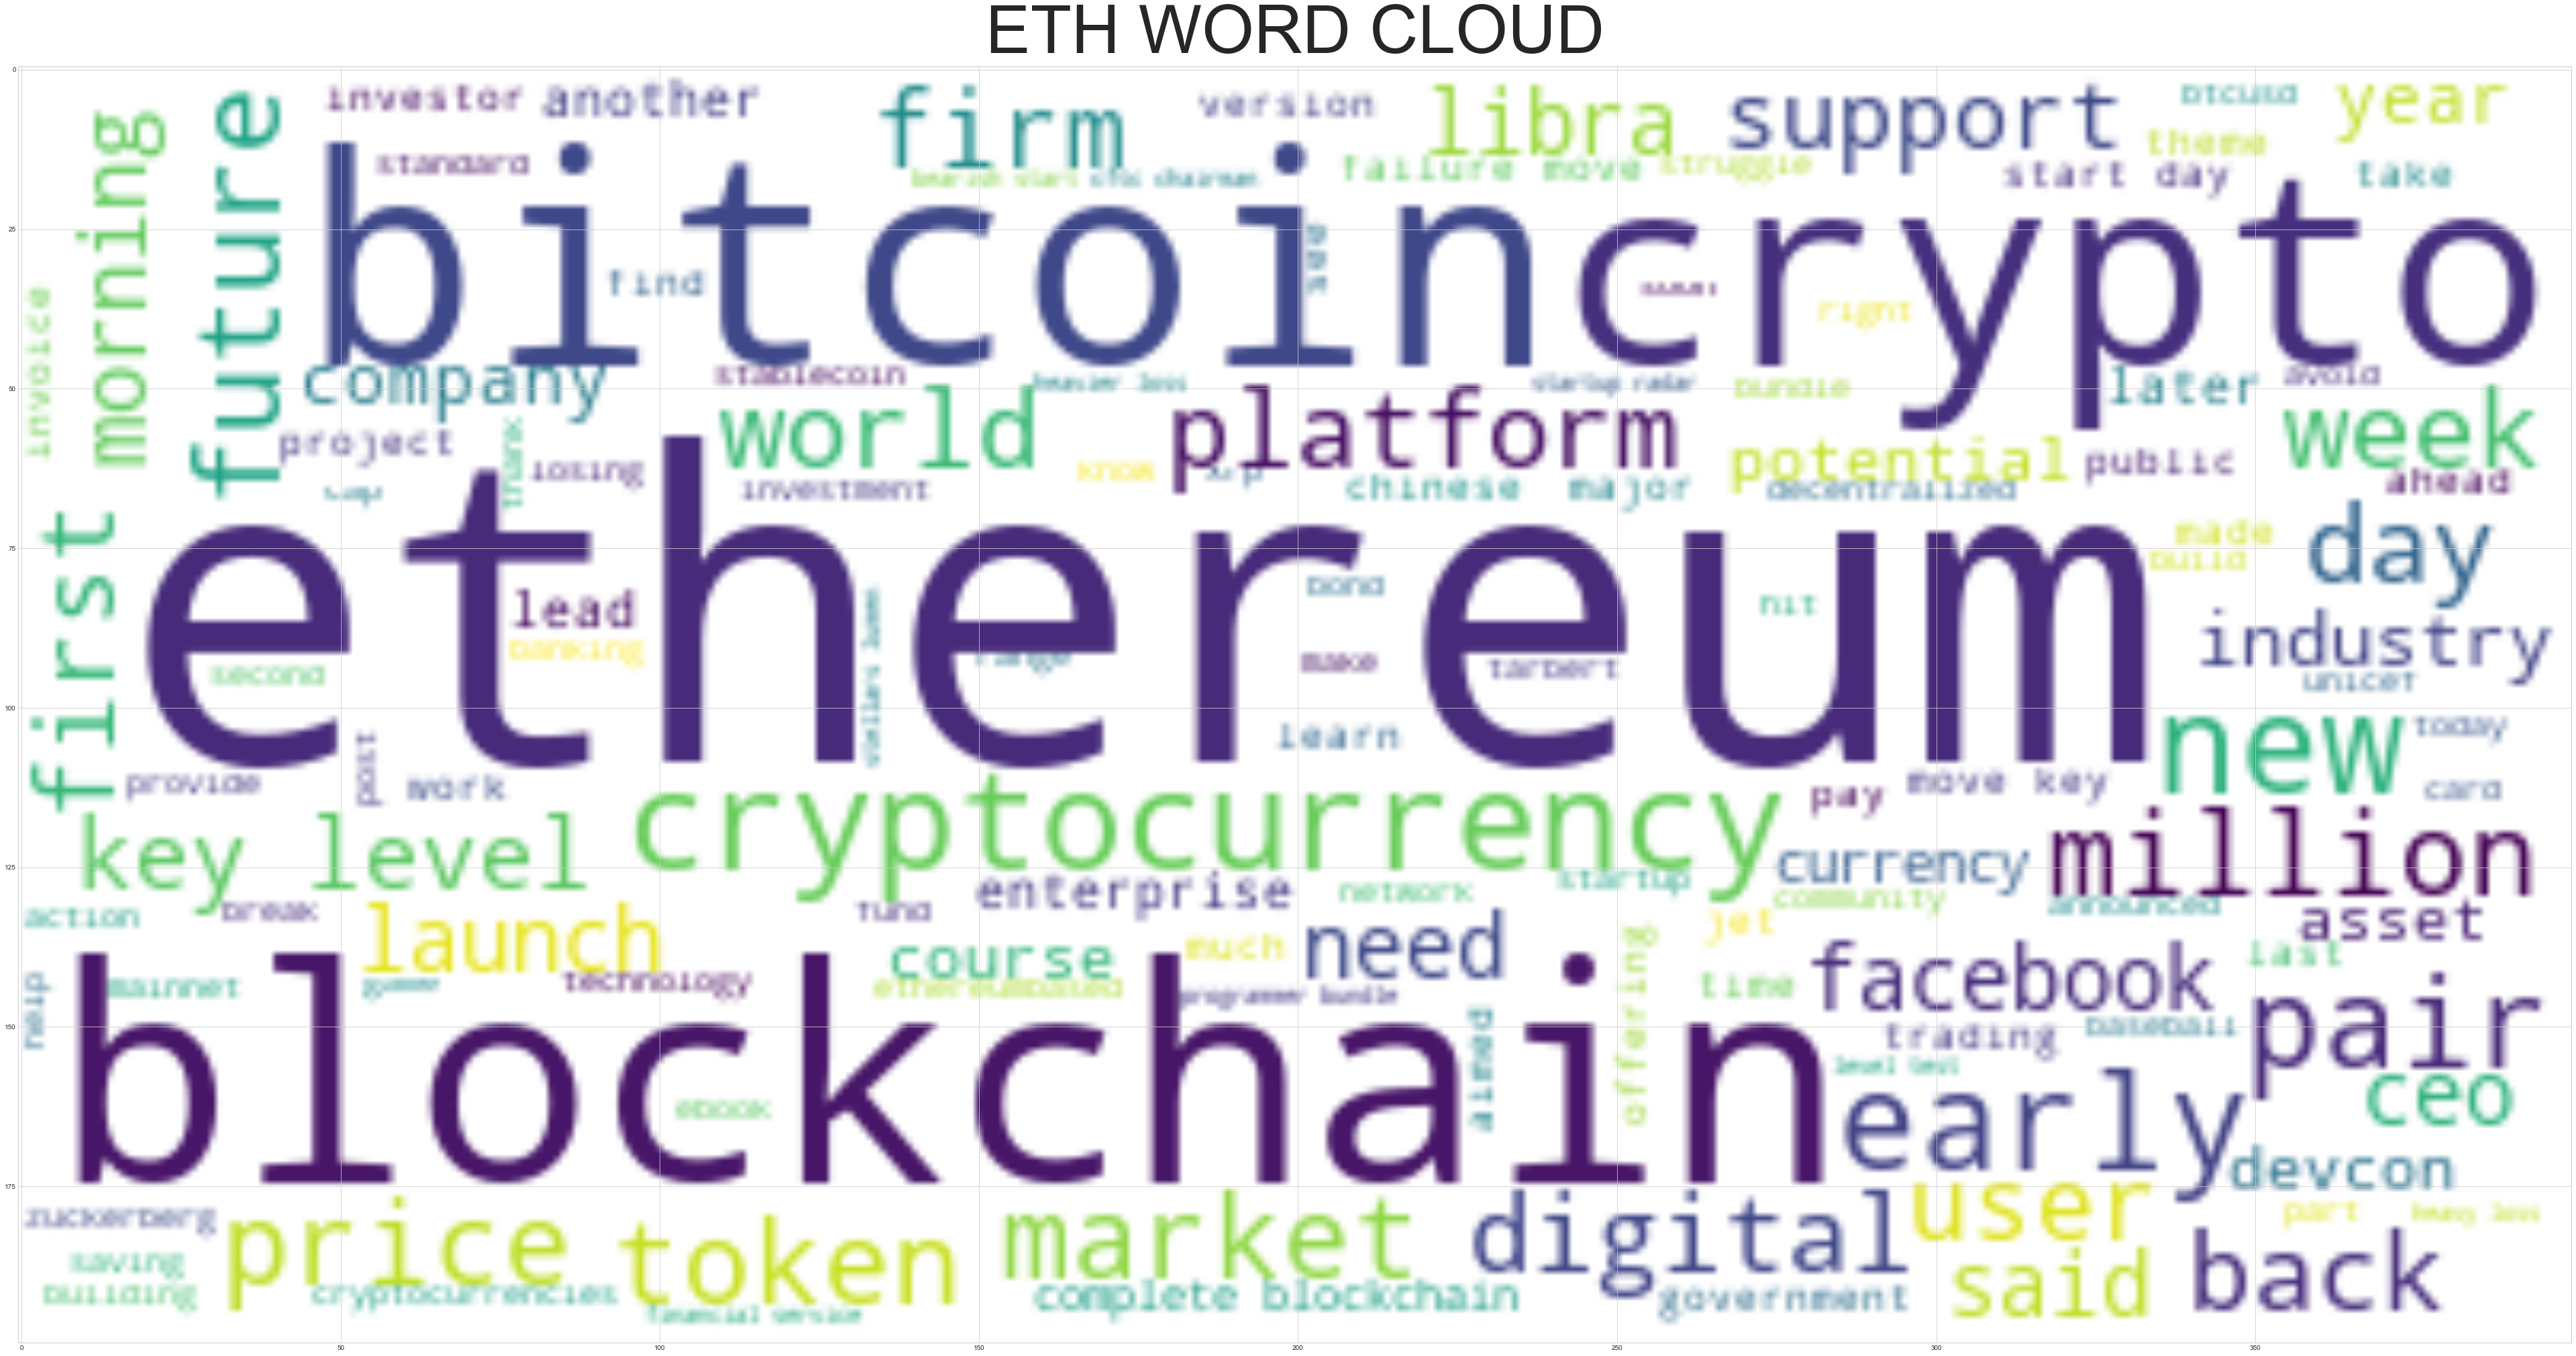

In [41]:
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_eth)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("ETH WORD CLOUD",fontsize=100)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [89]:
import spacy
from spacy import displacy

In [90]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [91]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [92]:
# Concatenate all of the bitcoin text together
concat_btc = btc_df['description'].str.cat(sep=', ')


In [93]:
# Run the NER processor on all of the text
doc = nlp(concat_btc)
doc.user_data["title"] = "BTC NER WORD CLOUD"
# Add a title to the document

In [94]:
# Render the visualization
displacy.render(doc, style='ent')

In [95]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('Nordic', 'LOC'),
 ('earlier this year', 'DATE'),
 ('HTC', 'ORG'),
 ('Exodus', 'GPE'),
 ('Bitc…', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('Three hundred and thirty-seven', 'QUANTITY'),
 ('last year', 'DATE'),
 ('U.S.', 'GPE'),
 ('South Korean', 'NORP'),
 ('’s', 'ORG'),
 ('Video', 'GPE'),
 ('Bit…', 'ORG'),
 ('France', 'GPE'),
 ('first', 'ORDINAL'),
 ('Complete Blockchain', 'ORG'),
 ('just $24', 'MONEY'),
 ('Bitcoin', 'GPE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('every fucking day', 'DATE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('’s', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('the past 24 hours', 'TIME'),
 ('Rousseau', 'PERSON'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('every fucking day', 'DATE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('’s', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('the past 24 hours', 'TIME'),
 ('Baudriallard', 'PERSON'),
 ('only one', 'CARDINAL'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('B

---

## Ethereum NER

In [96]:
# Concatenate all of the bitcoin text together
concat_eth = eth_df['description'].str.cat(sep=', ')
concat_eth

'TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20. When it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it\'s a worthy investment, and it when it comes to top …, Disrupt Berlin is right around the corner. And there is plenty to look forward to. Join us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as Aw…, After first teasing the device earlier this year, HTC has detailed its new, more affordable Exodus 1s blockchain smartphone. The highlight feature of the device is that it can function as a full node. This means the phone is able to validate and transmit Bitc…, he plaBy now, you should almost certainly know about Ethereum, the second largest cryptocurrency by market cap. But if you needed a quick recap, here it is. Ethereum’s creators wanted to build a platform that wou

In [97]:
# Run the NER processor on all of the text
doc = nlp(concat_eth)
doc.user_data["title"] = "ETH NER WORD CLOUD"
# Add a title to the document

In [98]:
# Render the visualization
displacy.render(doc, style='ent')

In [99]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in doc.ents])

[('Complete Blockchain', 'ORG'),
 ('just $24', 'MONEY'),
 ('Bitcoin', 'GPE'),
 ('Disrupt Berlin', 'PERSON'),
 ('Join', 'PERSON'),
 ('December 11 and December 12', 'DATE'),
 ('Aw…', 'ORG'),
 ('first', 'ORDINAL'),
 ('earlier this year', 'DATE'),
 ('HTC', 'ORG'),
 ('Exodus', 'GPE'),
 ('Bitc…', 'PERSON'),
 ('Ethereum', 'GPE'),
 ('second', 'ORDINAL'),
 ('Ethereum’s', 'ORG'),
 ('30', 'MONEY'),
 ('Facebook', 'PERSON'),
 ('Libra', 'PERSON'),
 ('OpenLibra', 'ORG'),
 ('Libra', 'ORG'),
 ("Ethereum Foundation's", 'ORG'),
 ('Devcon 5…, Blockchain', 'ORG'),
 ('the year 2009', 'DATE'),
 ('Santoshi', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Blockchai…', 'FAC'),
 ('Bitcoin', 'GPE'),
 ('as much as 9%', 'PERCENT'),
 ('Wednesday', 'DATE'),
 ('June — ahead', 'DATE'),
 ('Mark Zuckerberg', 'PERSON'),
 ('Libra', 'PERSON'),
 ('Zuckerberg', 'PERSON'),
 ('House Financial Services Commi', 'ORG'),
 ('Opera Mobile', 'LOC'),
 ('Opera', 'ORG'),
 ('10', 'CARDINAL'),
 ('Dan Conway', 'PERSON'),
 ('Silicon Valley', 'LOC'),
 ('300